# First try of OpenAI-Gym

In [1]:
import gym

env = gym.make('CartPole-v0')
env.reset()
box = env.observation_space

[2018-01-19 16:38:59,260] Making new env: CartPole-v0


In [2]:
env.action_space

Discrete(2)

In [3]:
env.reset()
done = False
counter = 0
while not done:
    observation, reward, done, _ = env.step(env.action_space.sample())
    counter += 1
print(counter)

12


# Random Search with linear model
We perform a random search on the parameters used for the agent in the choice of the action. <br>
We use a vector of 4 parameters that will be multiplicated with the state, and the action will be left if the result is negative, and right otherwise. <br>
We try 100 different random parameter vectors and for each we play 100 episodes, taking their average length as a quality measure of the parameters.

[2018-01-19 16:38:59,758] Making new env: CartPole-v0


Avg length: 73.64
Avg length: 9.39
Avg length: 83.66
Avg length: 192.31
Avg length: 107.45
Avg length: 9.26
Avg length: 9.53
Avg length: 9.16
Avg length: 9.31
Avg length: 99.98
Avg length: 9.47
Avg length: 9.25
Avg length: 36.62
Avg length: 38.84
Avg length: 53.82
Avg length: 66.07
Avg length: 9.43
Avg length: 9.35
Avg length: 34.78
Avg length: 62.43
Avg length: 9.48
Avg length: 200.0
Avg length: 9.58
Avg length: 63.83
Avg length: 9.89
Avg length: 9.35
Avg length: 9.33
Avg length: 25.12
Avg length: 9.07
Avg length: 9.17
Avg length: 9.68
Avg length: 9.79
Avg length: 26.71
Avg length: 9.22
Avg length: 9.27
Avg length: 26.74
Avg length: 36.27
Avg length: 31.64
Avg length: 9.76
Avg length: 9.57
Avg length: 9.33
Avg length: 8.71
Avg length: 9.23
Avg length: 19.98
Avg length: 8.98
Avg length: 99.99
Avg length: 9.47
Avg length: 41.04
Avg length: 77.85
Avg length: 9.37
Avg length: 36.51
Avg length: 8.91
Avg length: 9.43
Avg length: 8.98
Avg length: 77.89
Avg length: 9.04
Avg length: 22.61
Avg 

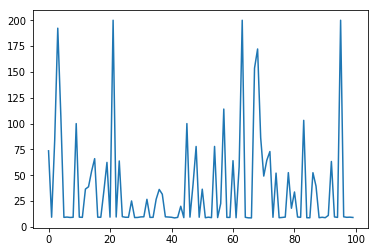

Avg length: 200.0
Best params length: 200.0



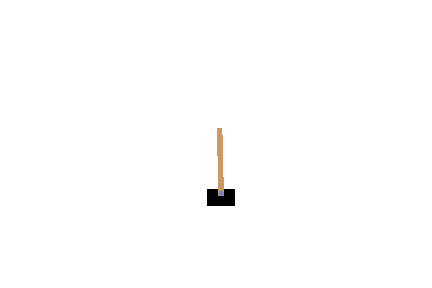
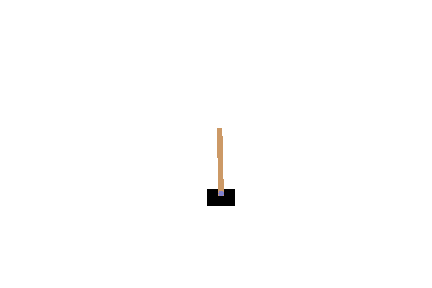
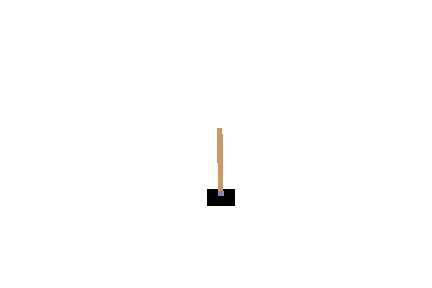
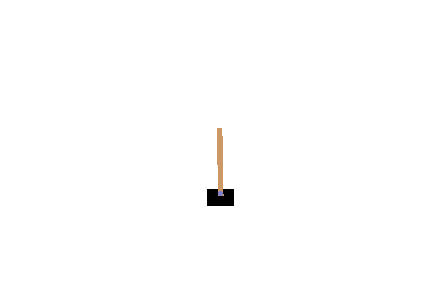
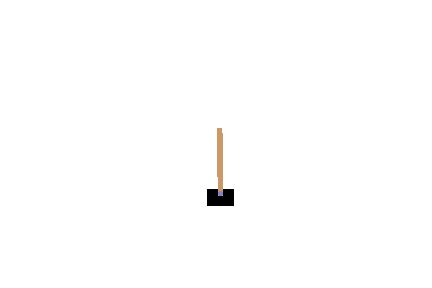
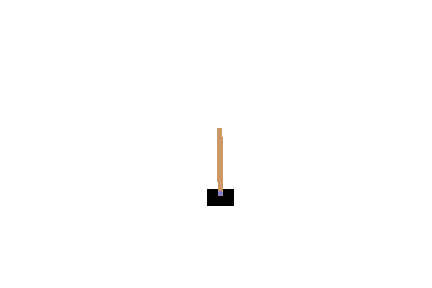
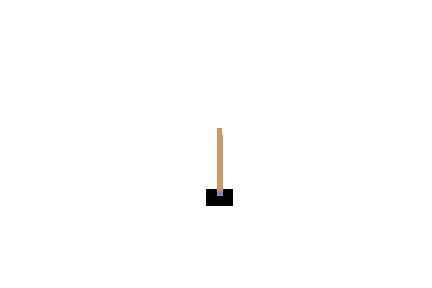
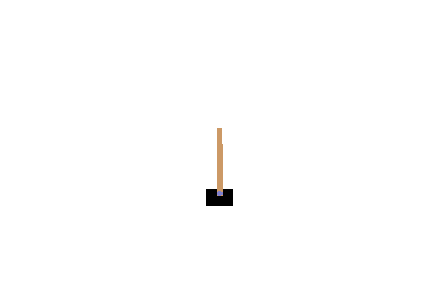
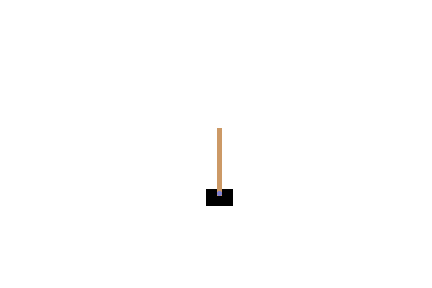
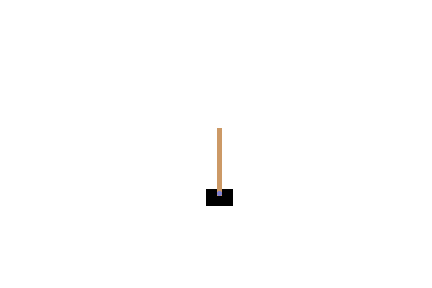
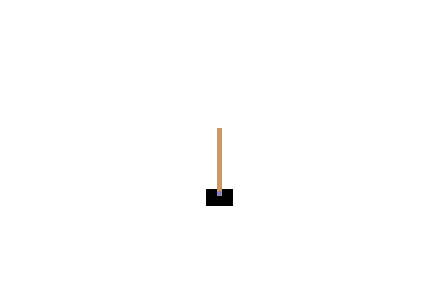
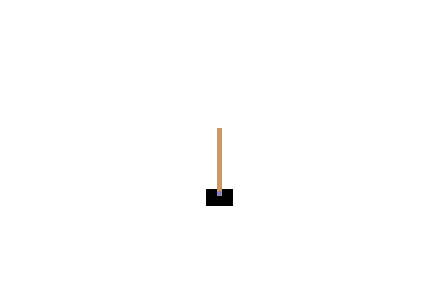
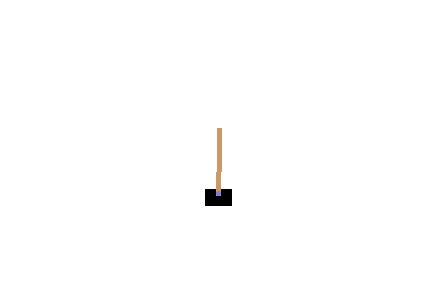
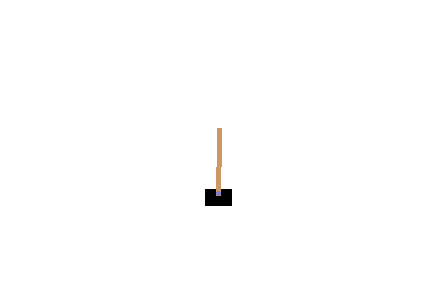
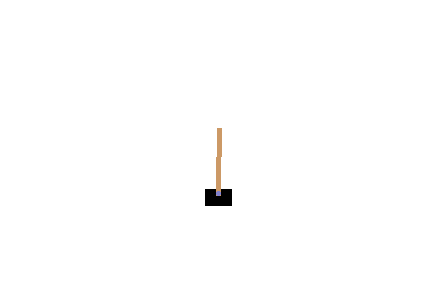
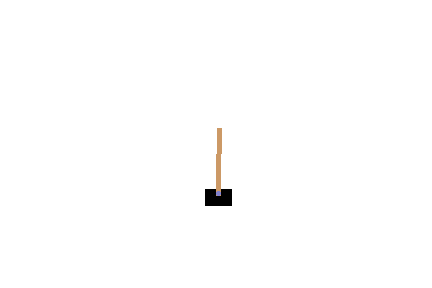
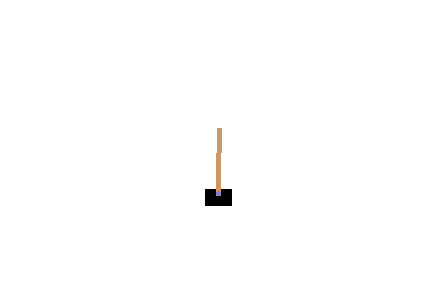
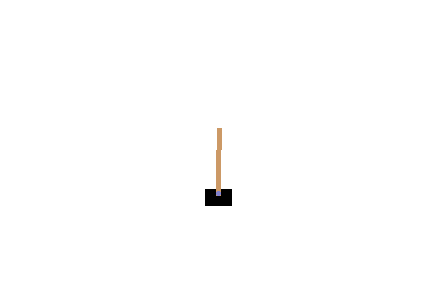
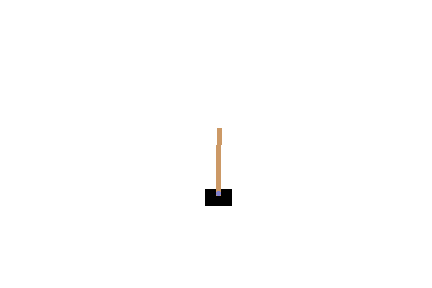
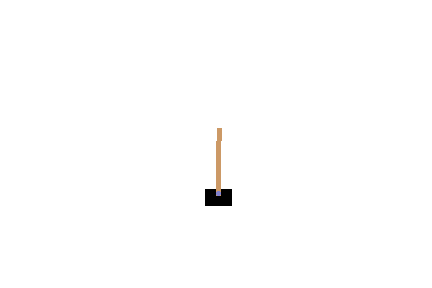
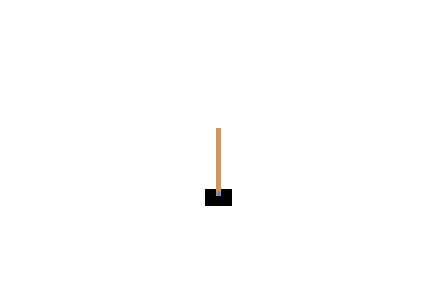
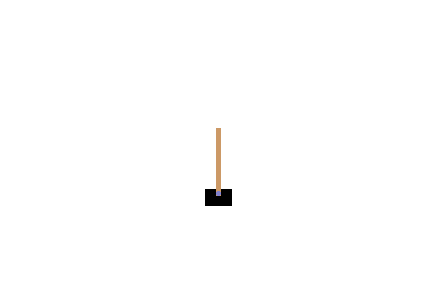
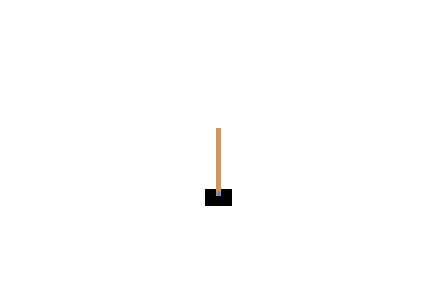
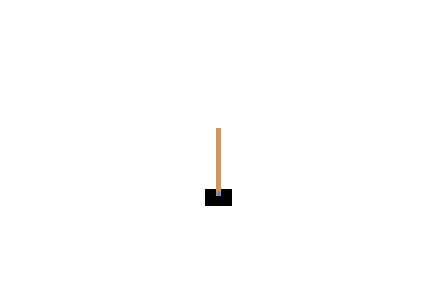
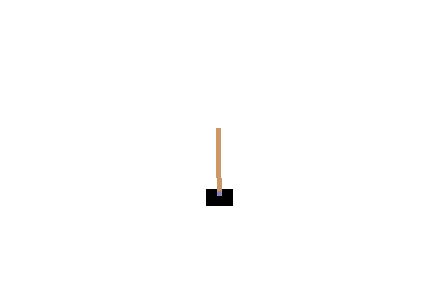
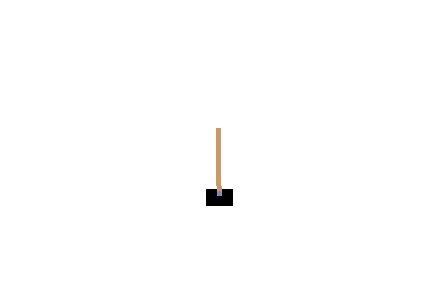
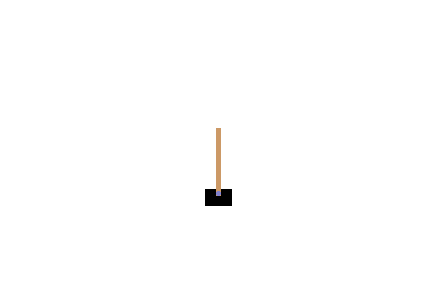
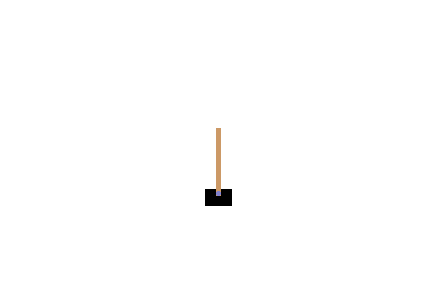
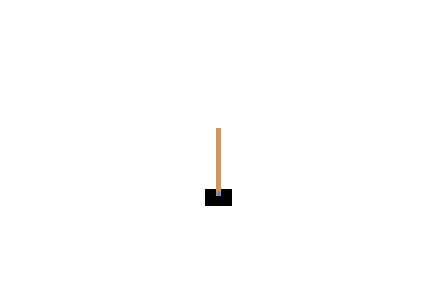
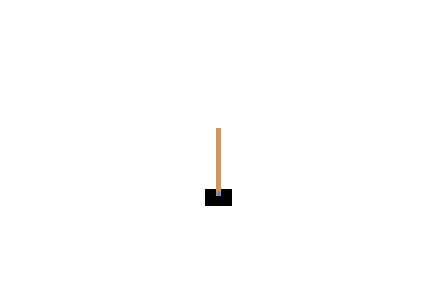
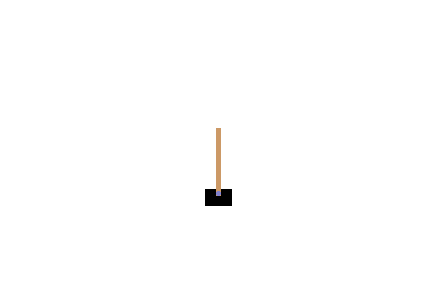
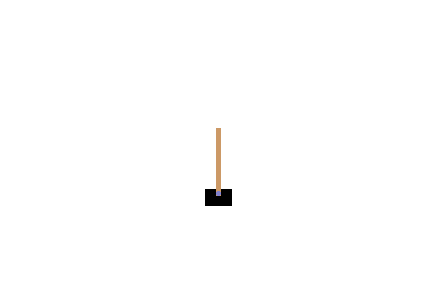
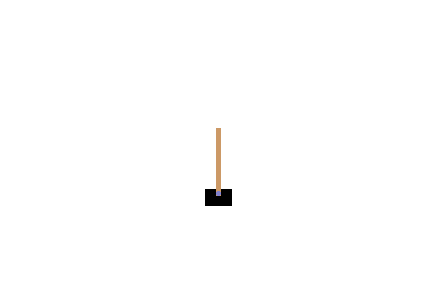
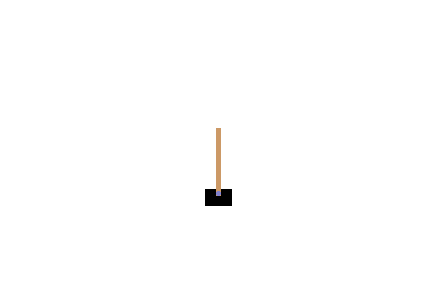
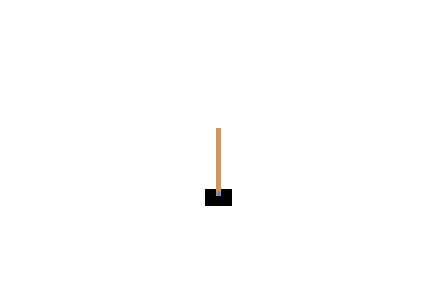
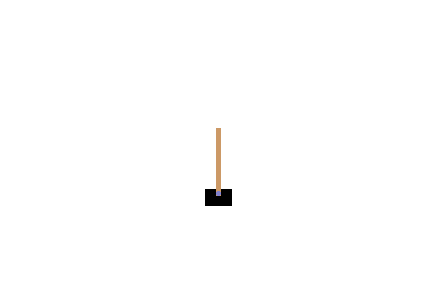
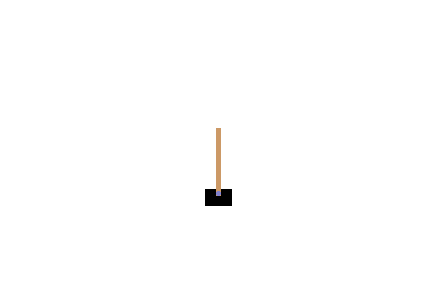
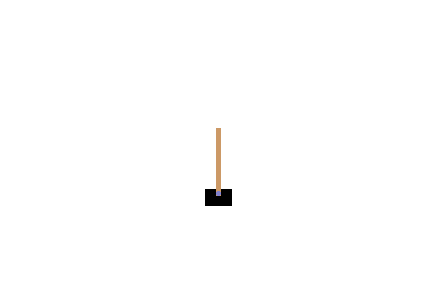
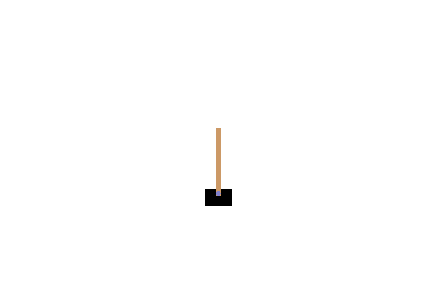
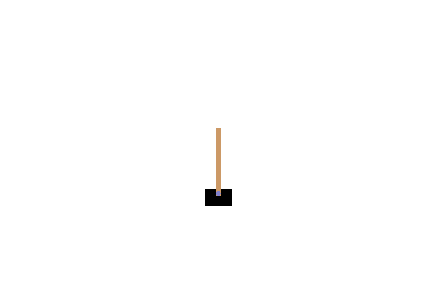
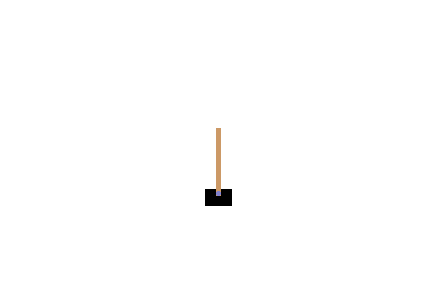
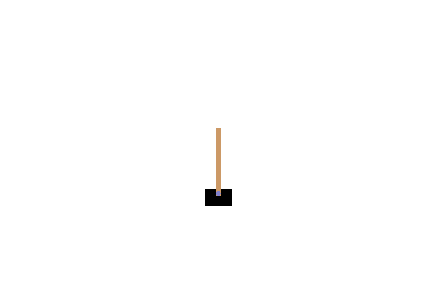
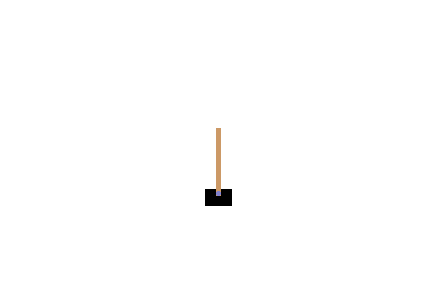
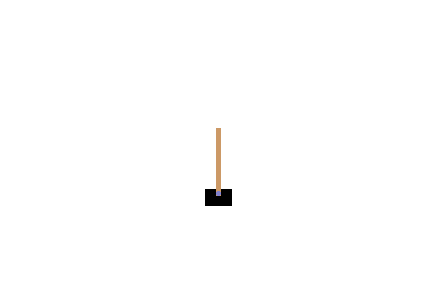
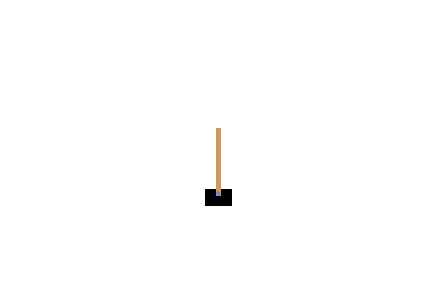
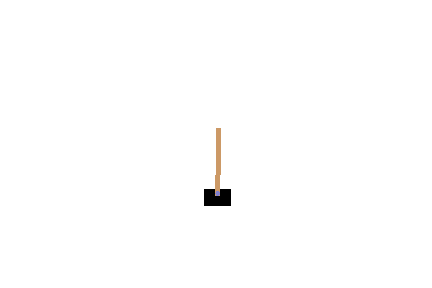
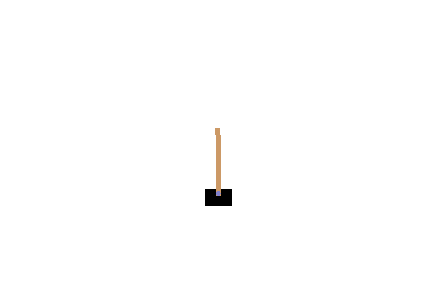
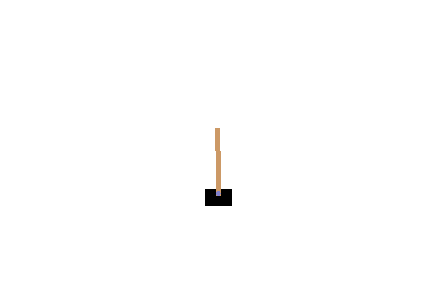
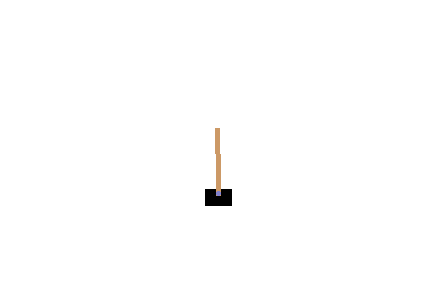
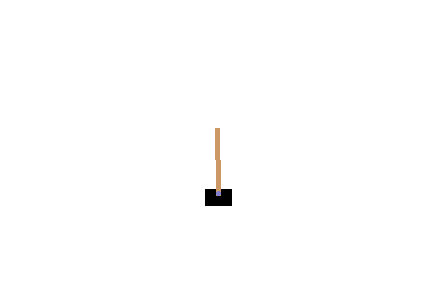
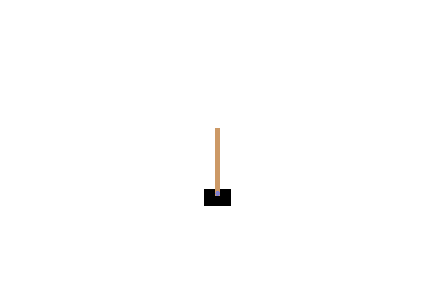
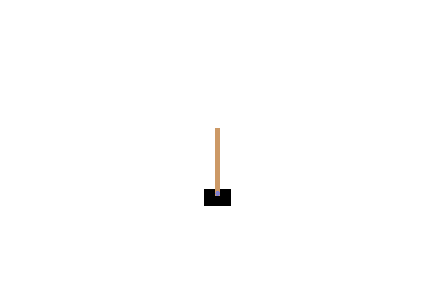
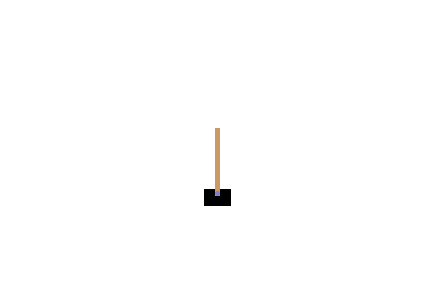
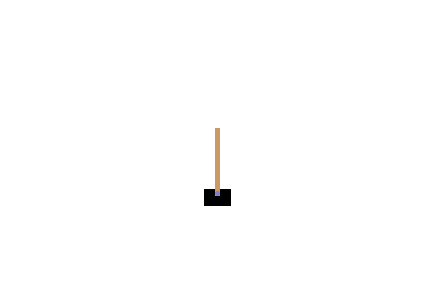
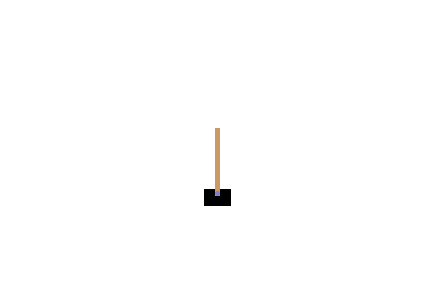
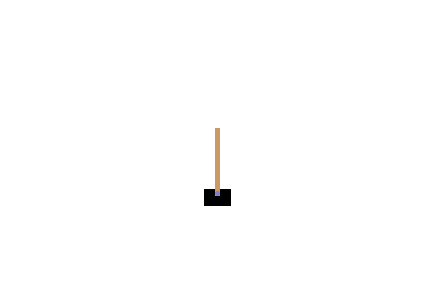
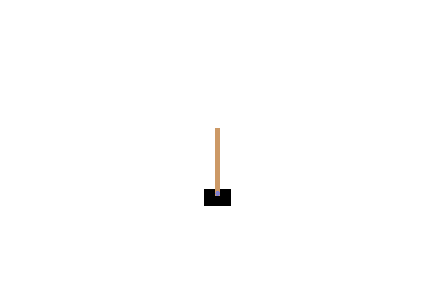
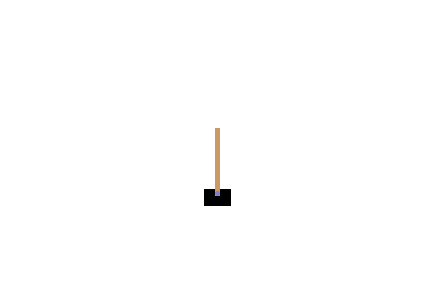
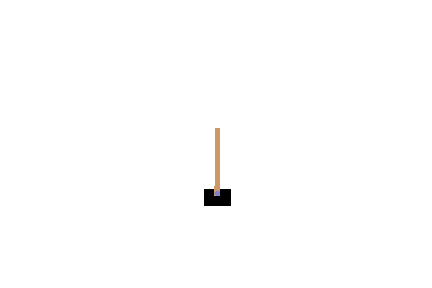
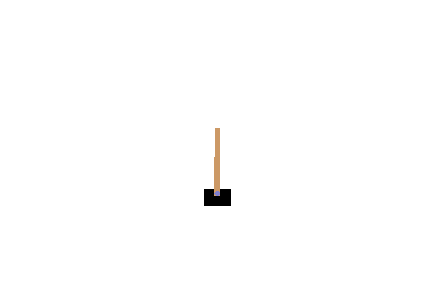
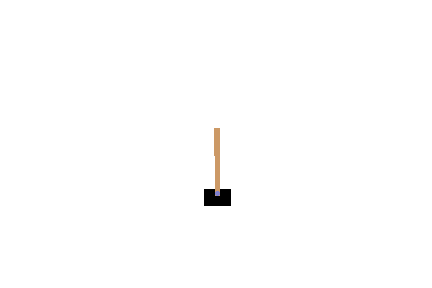
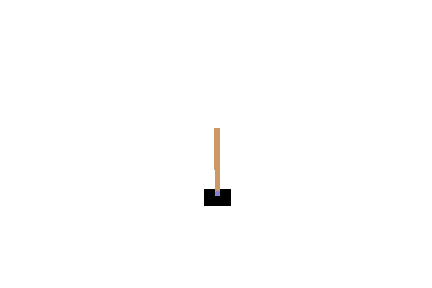
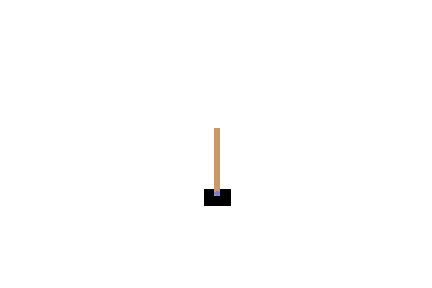
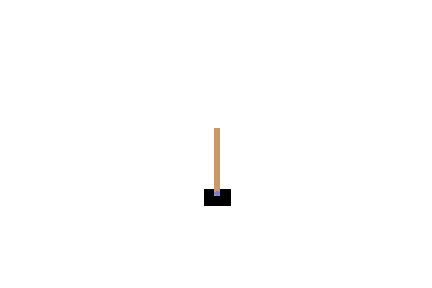
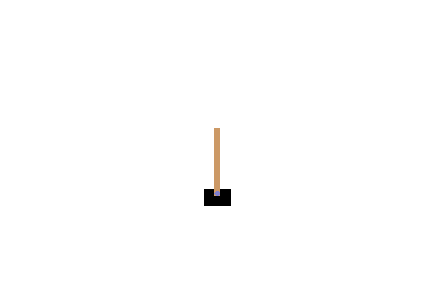
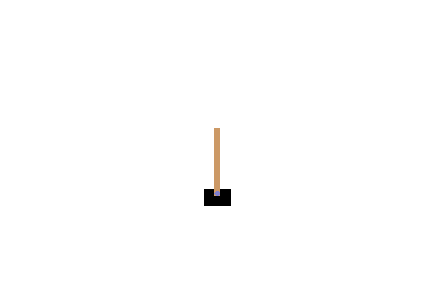
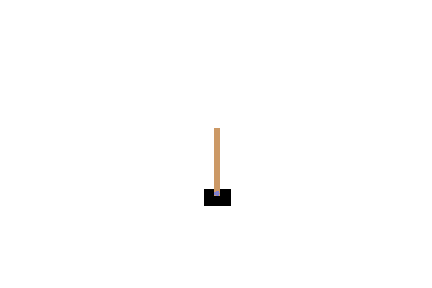
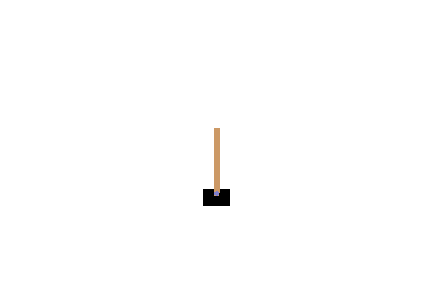
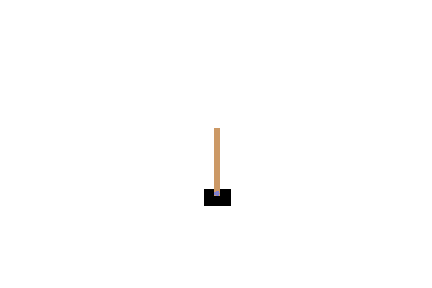
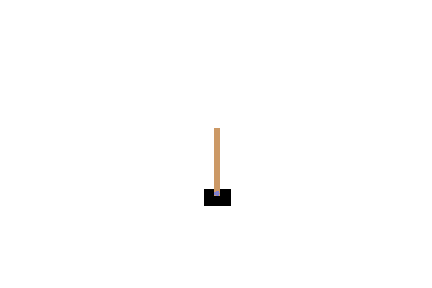
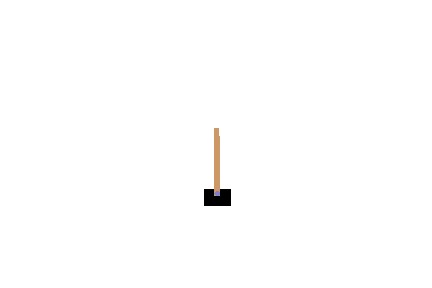
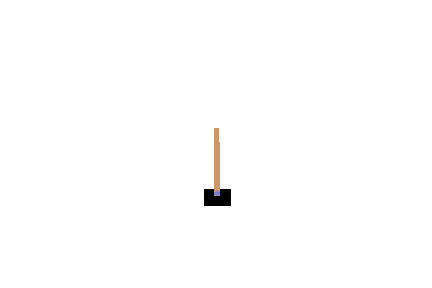
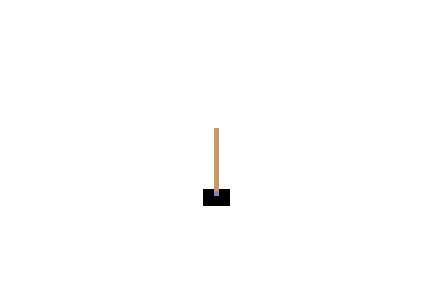
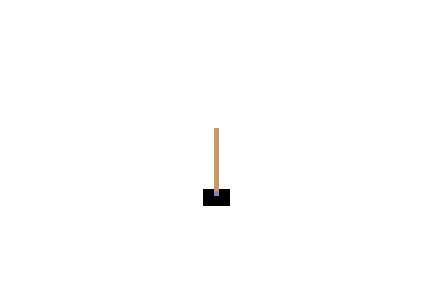
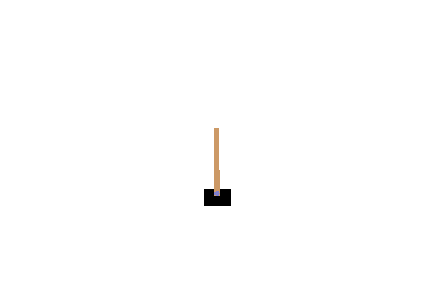
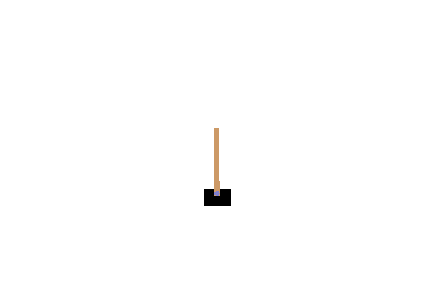
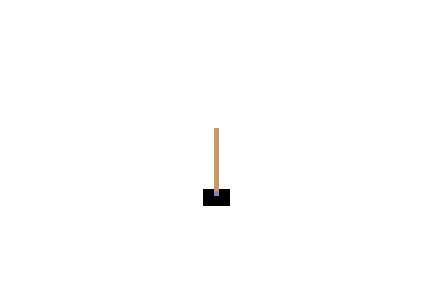
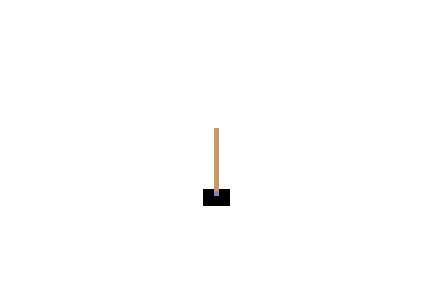
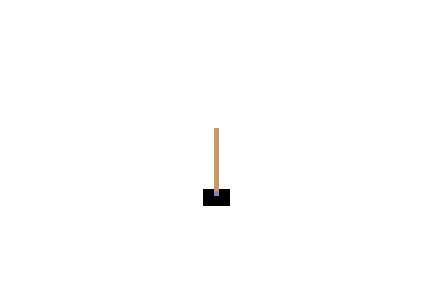
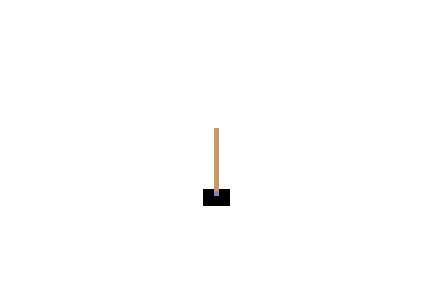
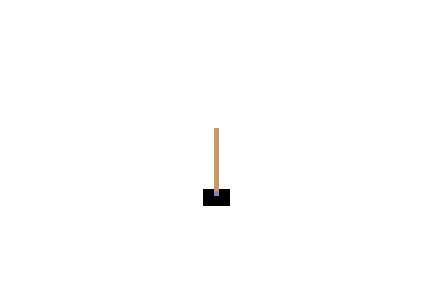
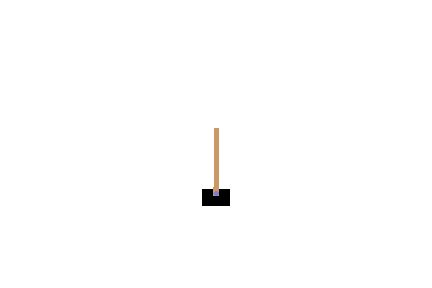
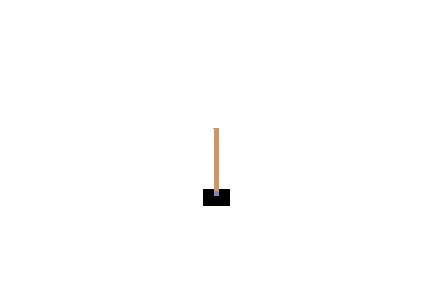
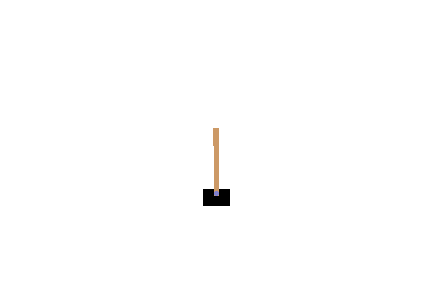
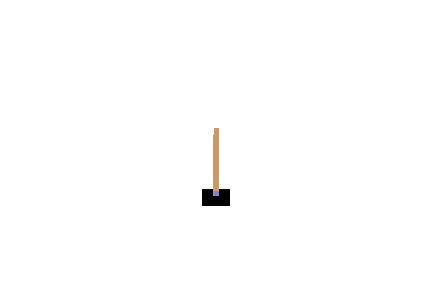
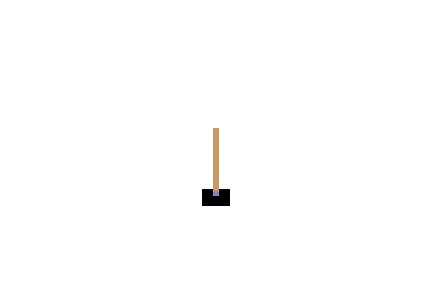
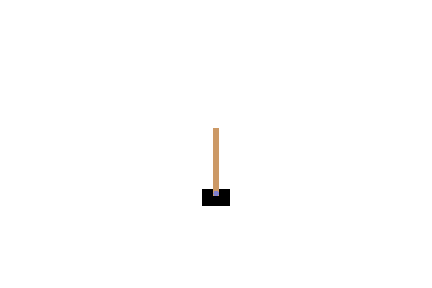
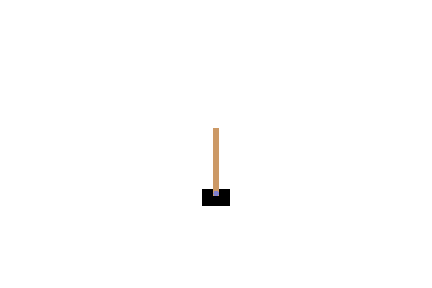
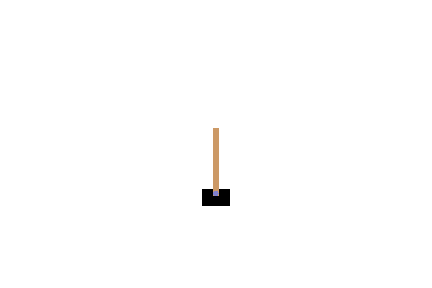
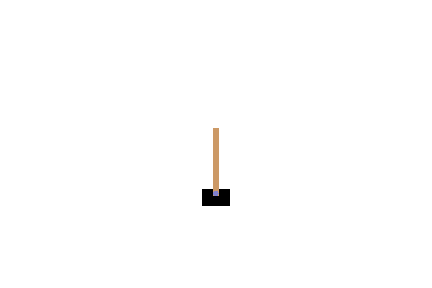
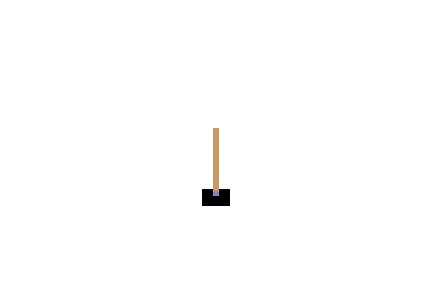
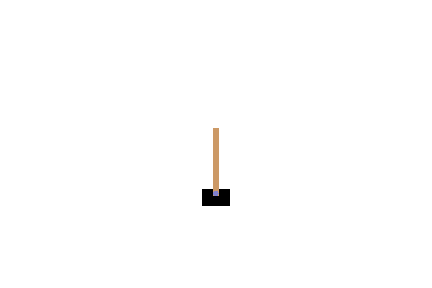
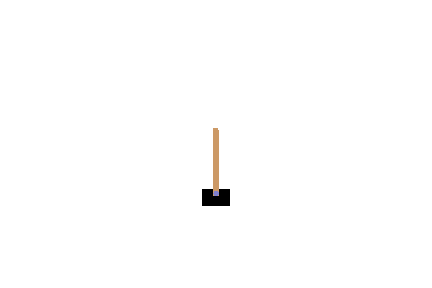
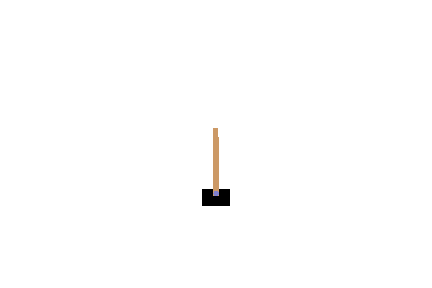
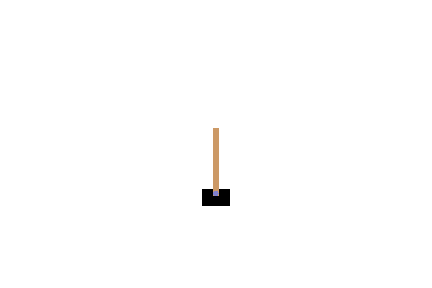
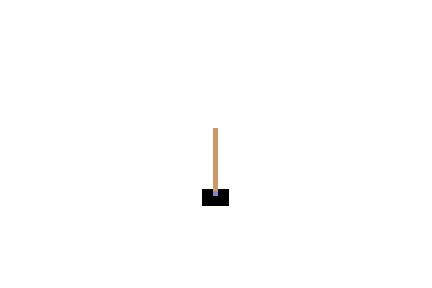
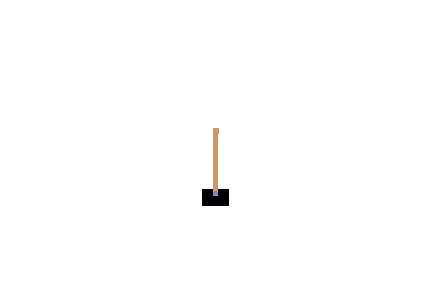
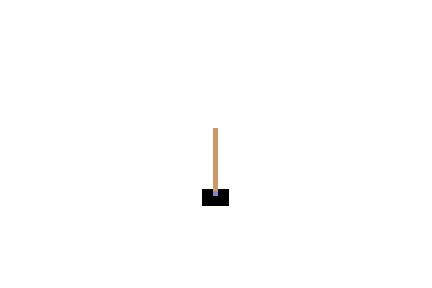
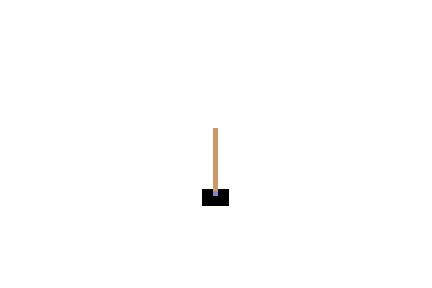
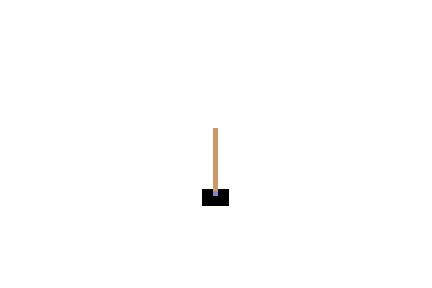
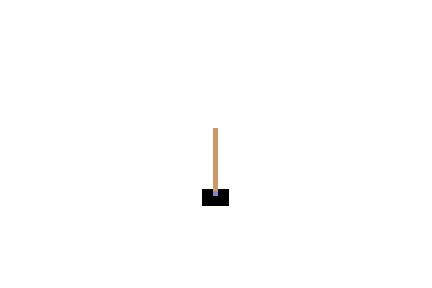
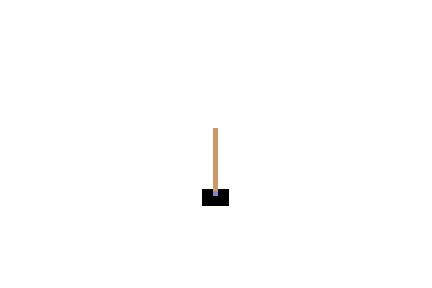
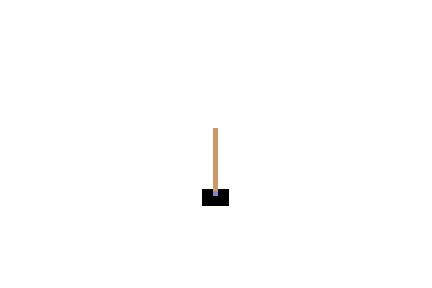
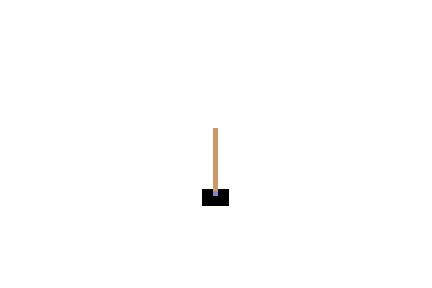
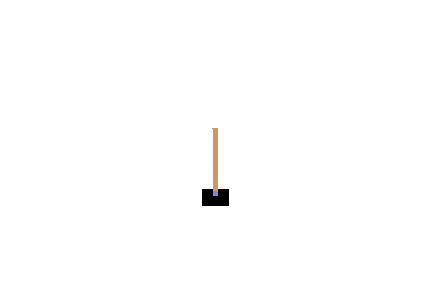
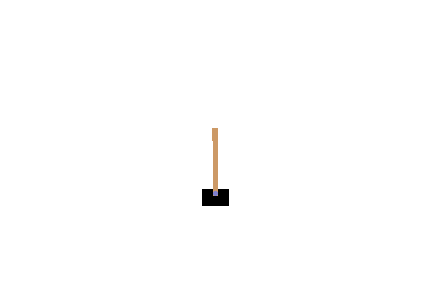
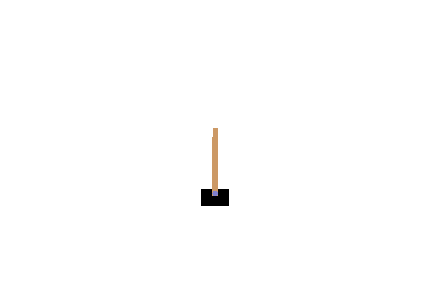
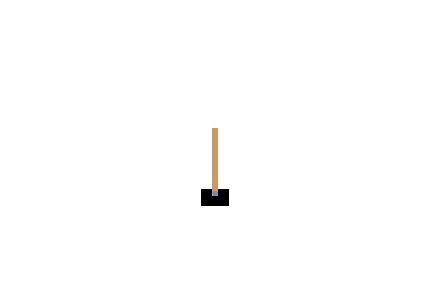
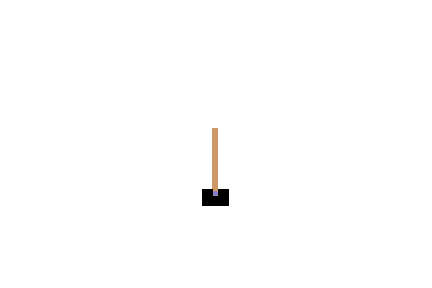
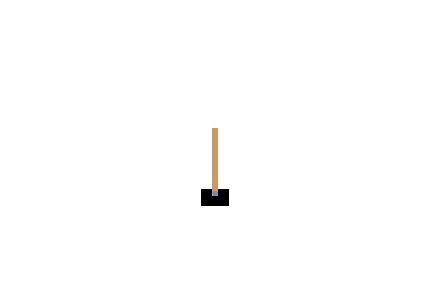
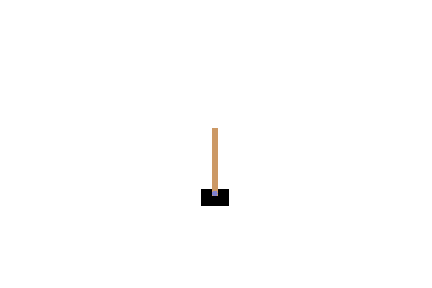
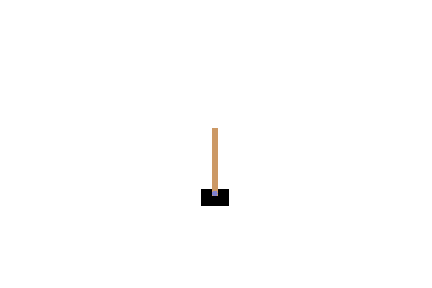
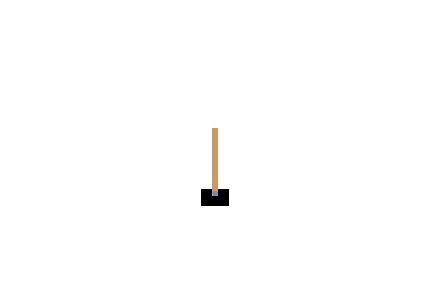
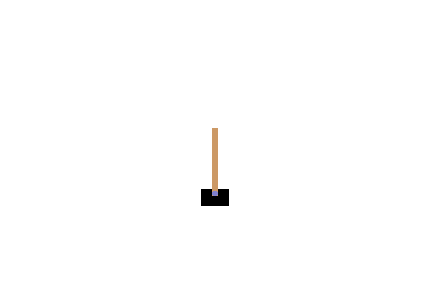
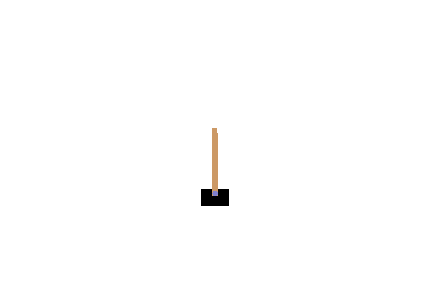
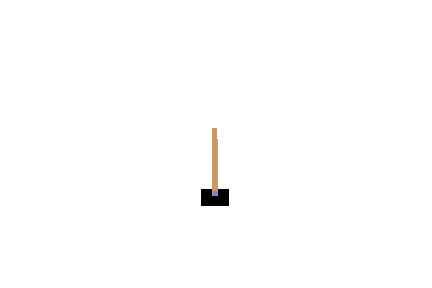
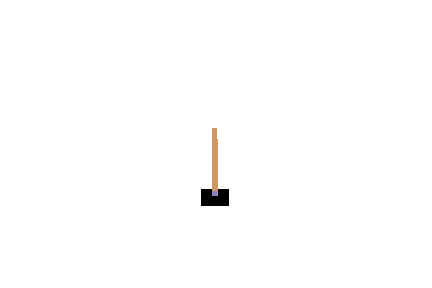
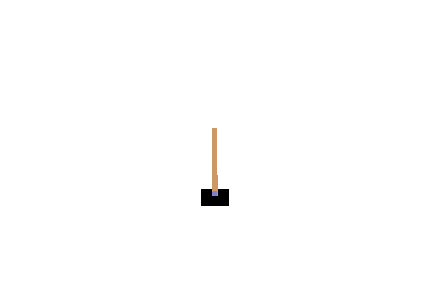
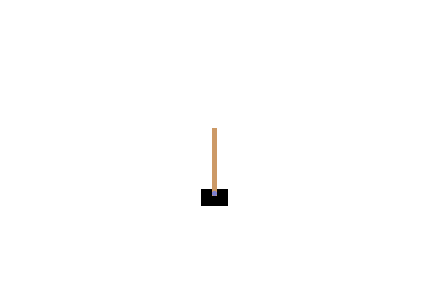
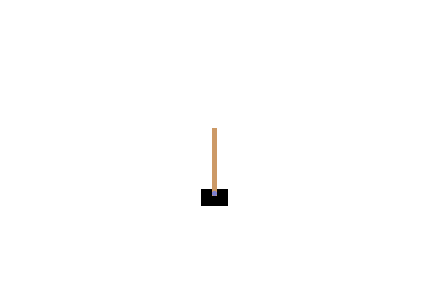
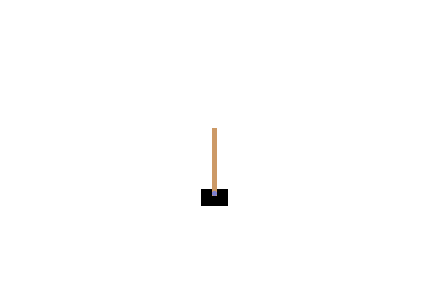
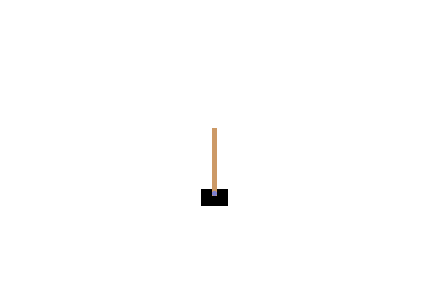
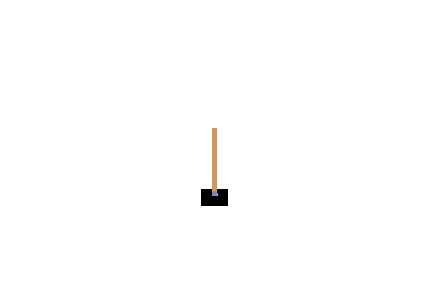
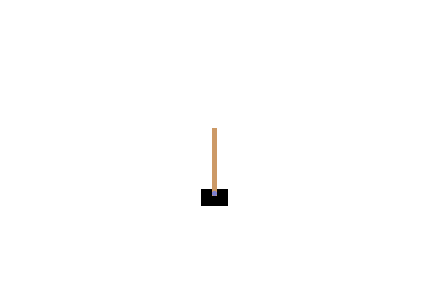
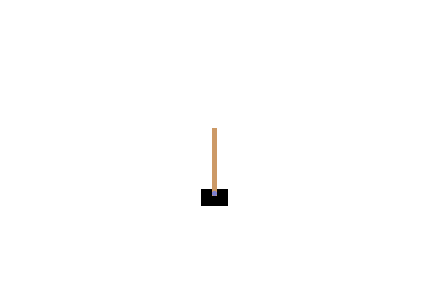
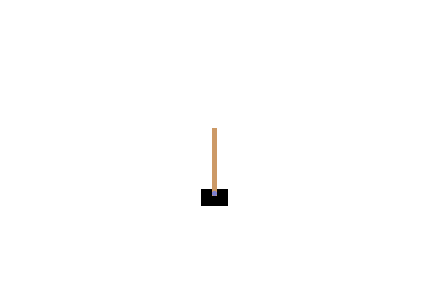
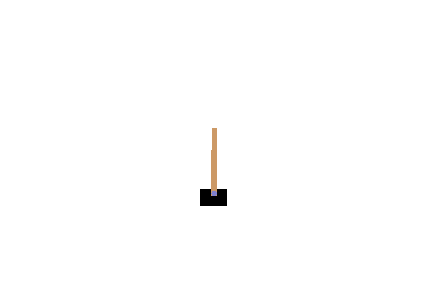
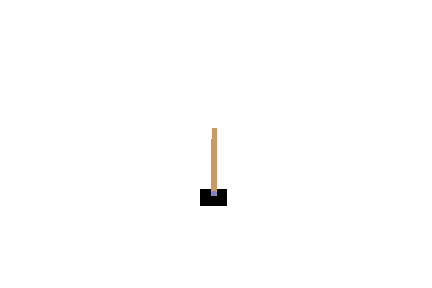
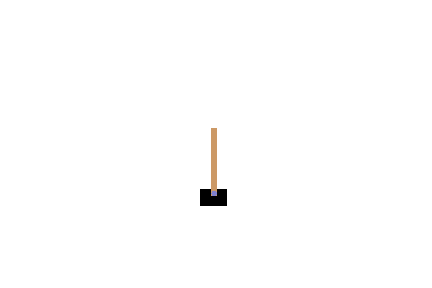
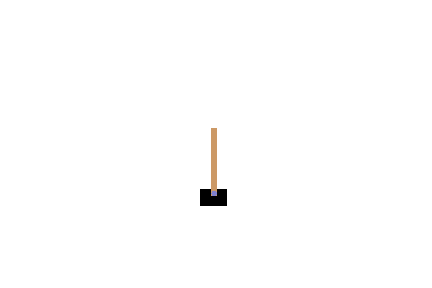
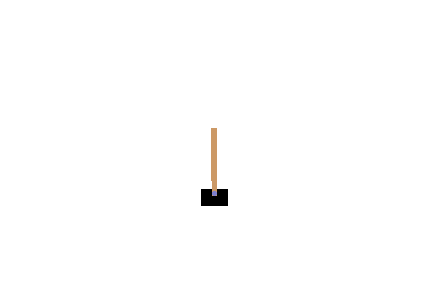
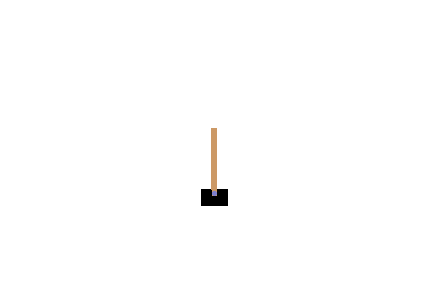
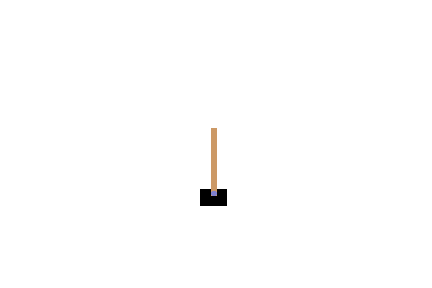
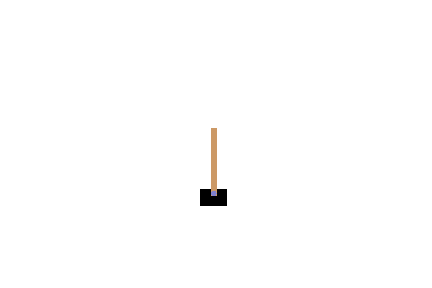
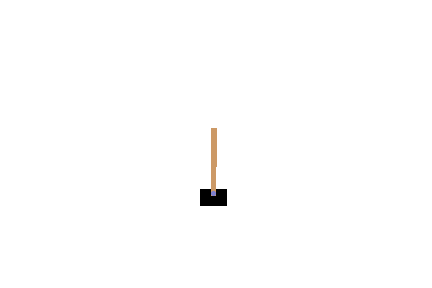
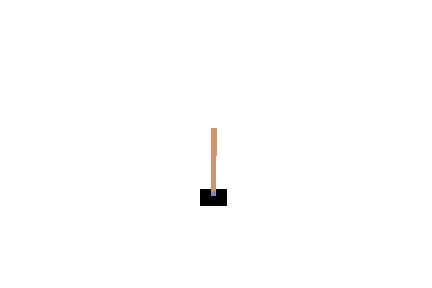
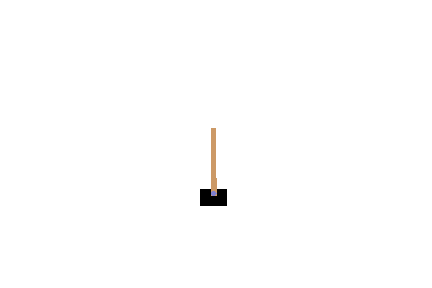
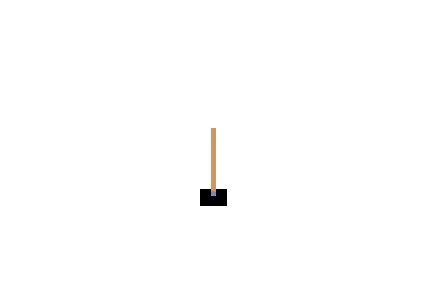
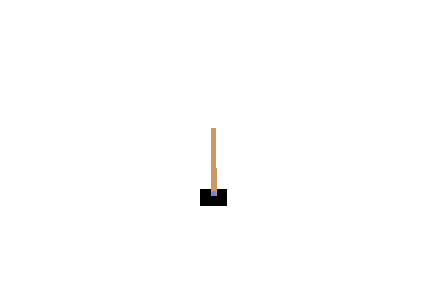
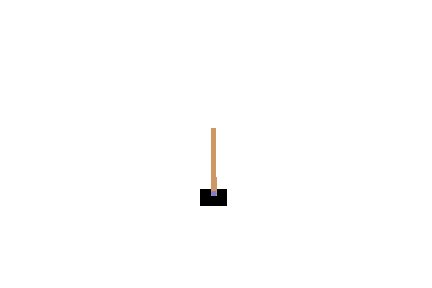
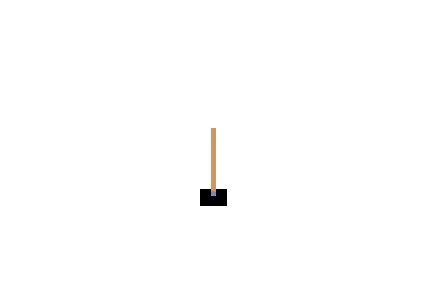
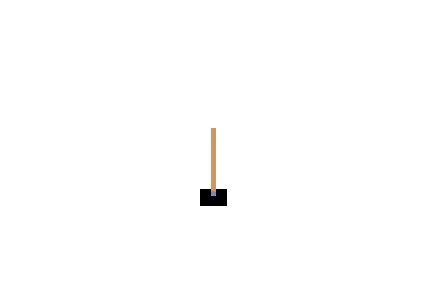
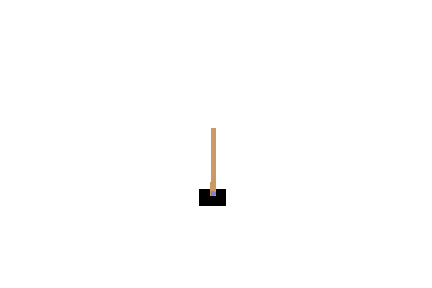
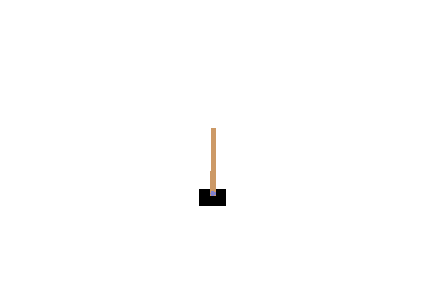
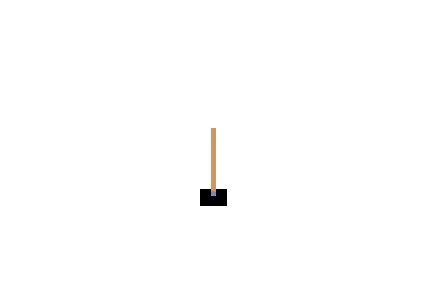
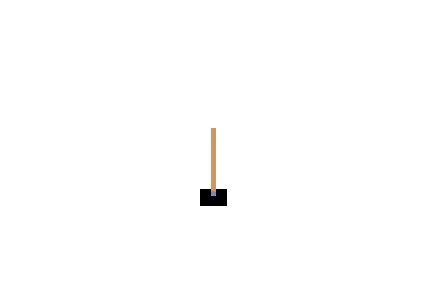
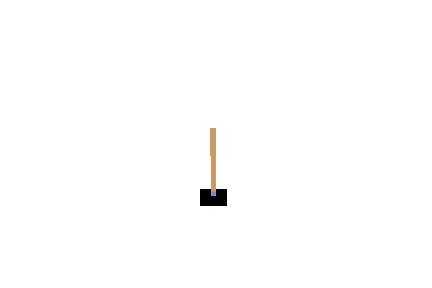
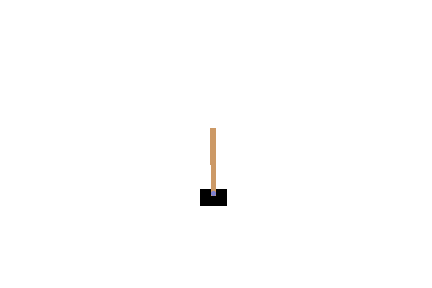
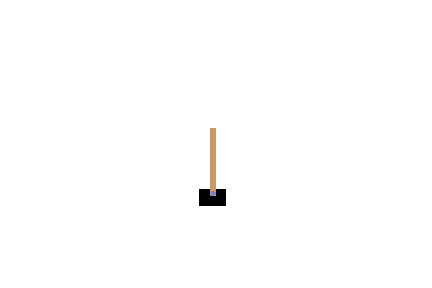
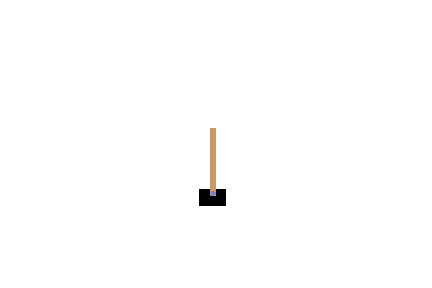
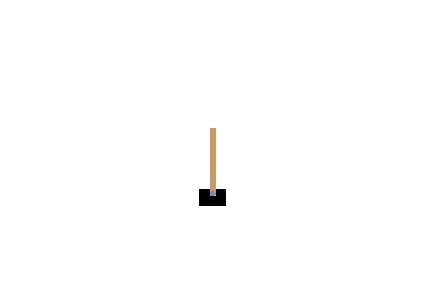
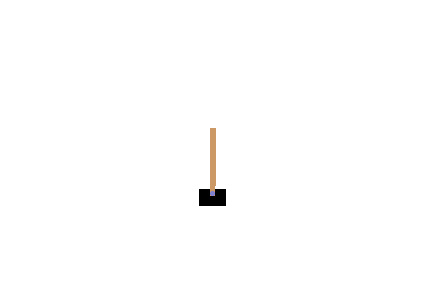
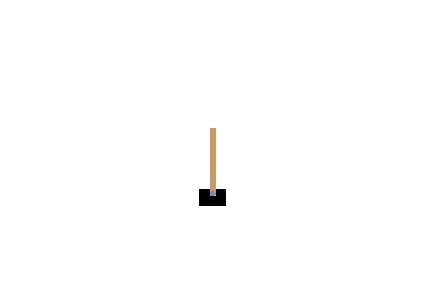
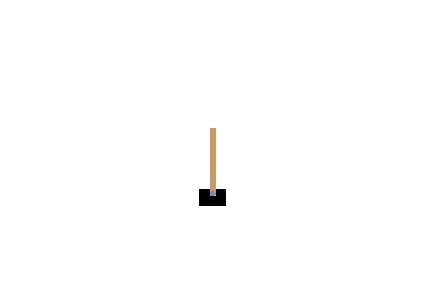
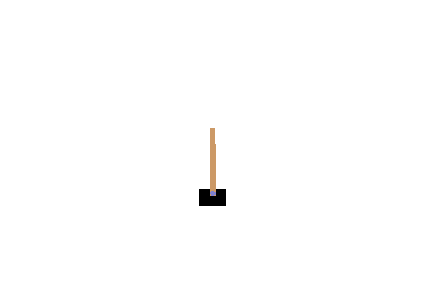
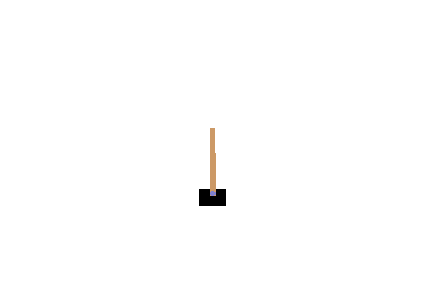
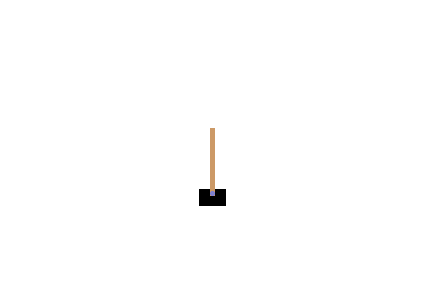
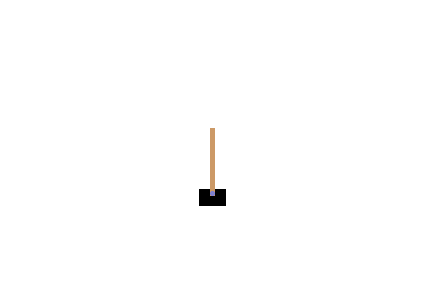
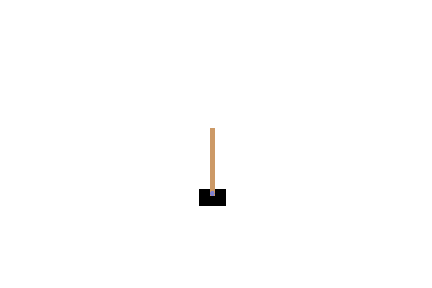
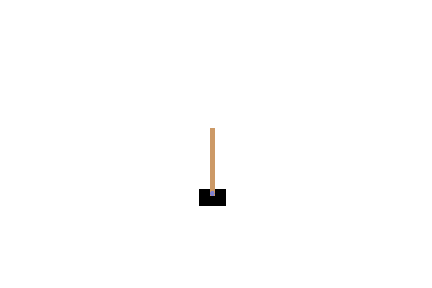
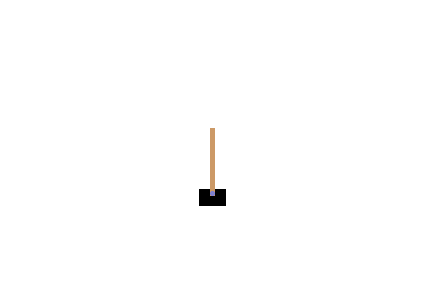
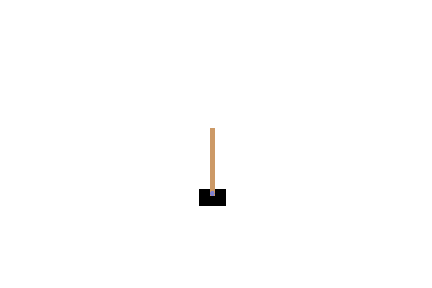
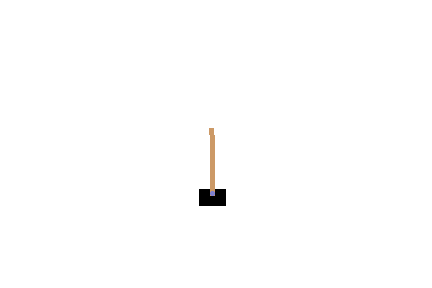
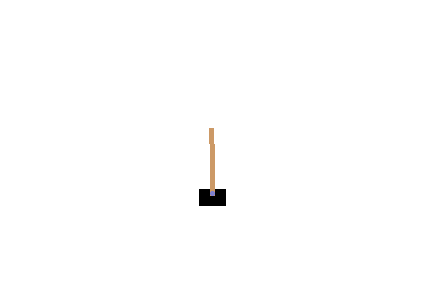
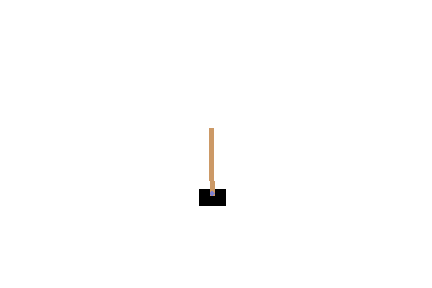
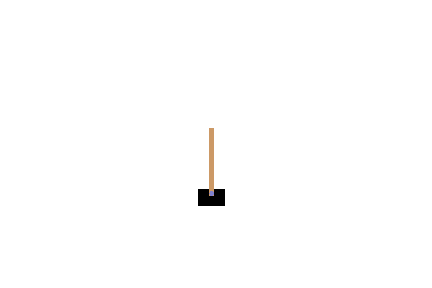
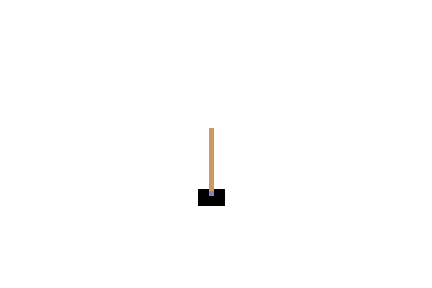
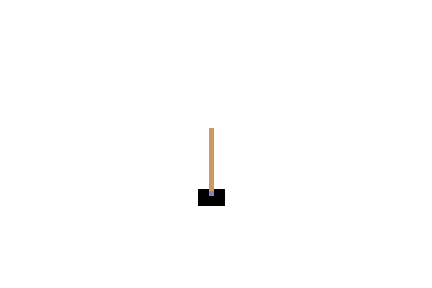
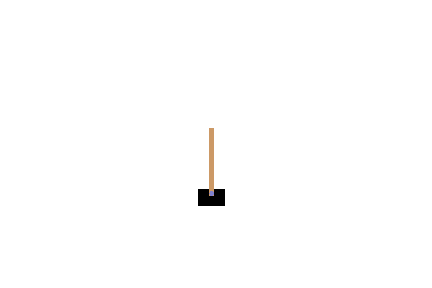
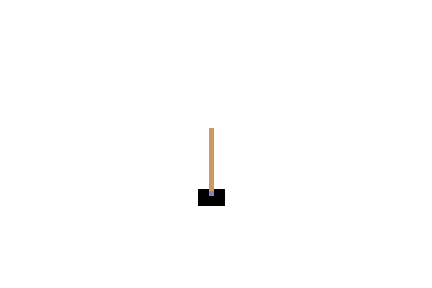
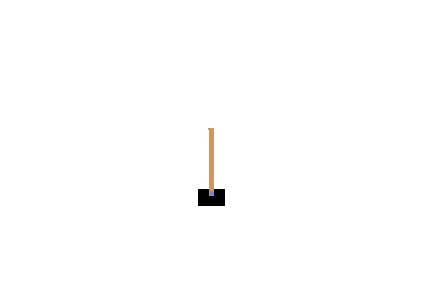
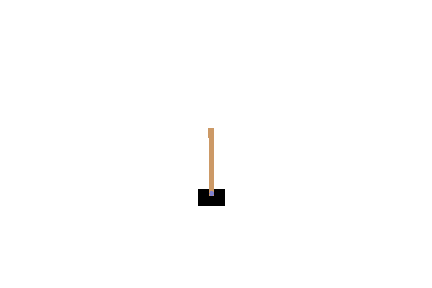
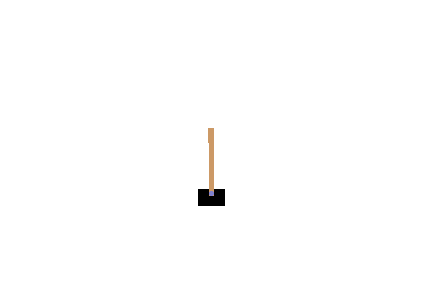
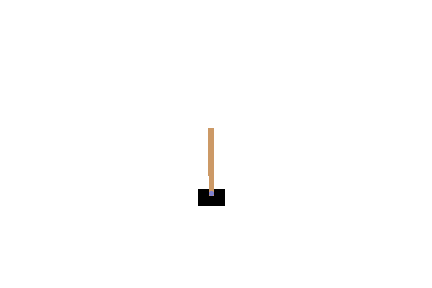
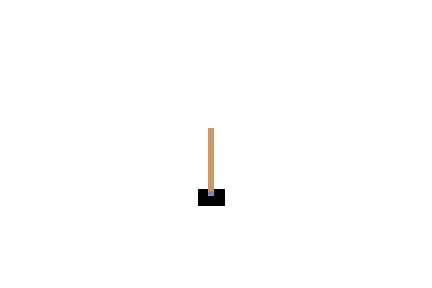
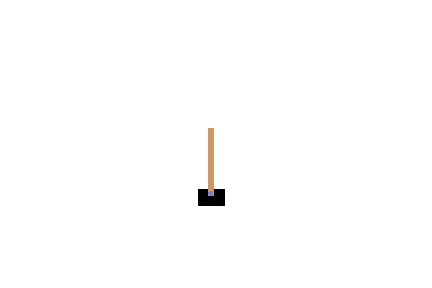
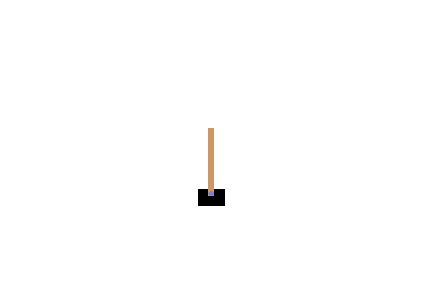
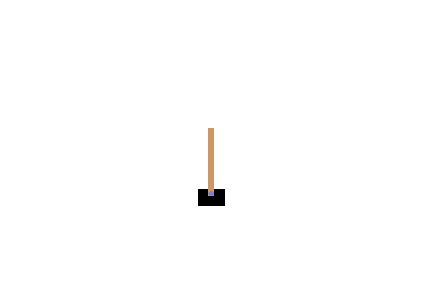
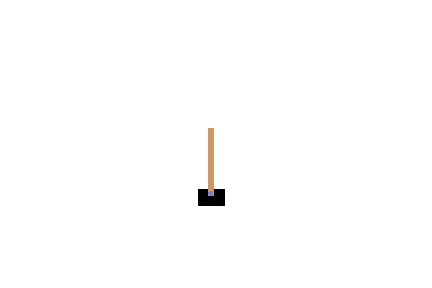
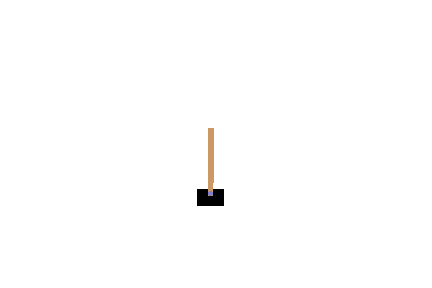
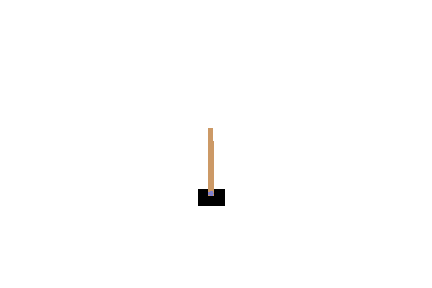
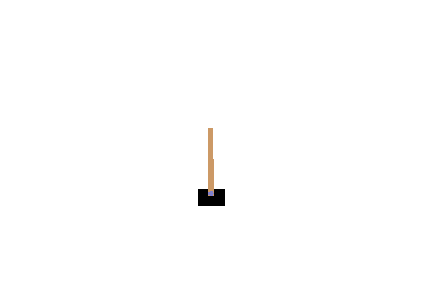
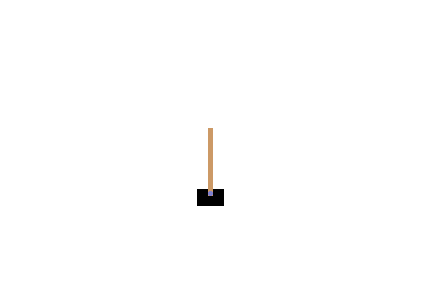
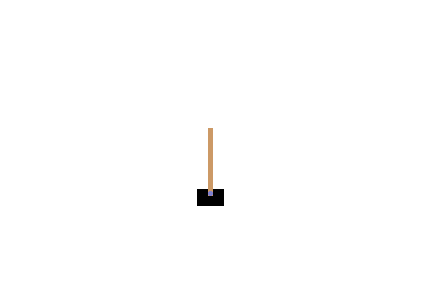
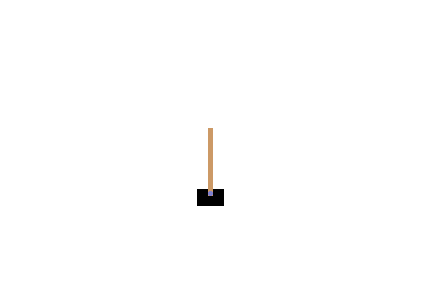
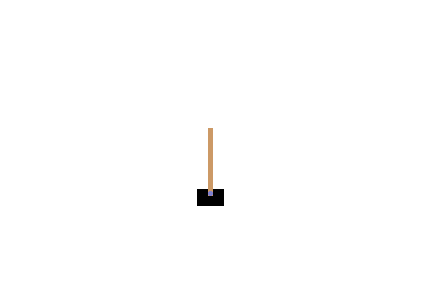
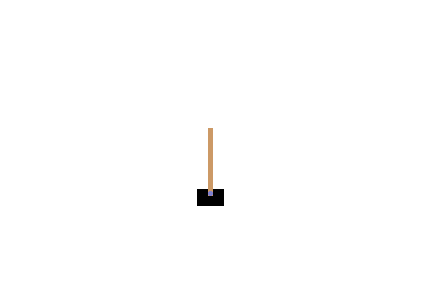
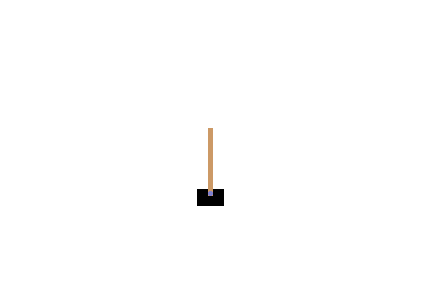
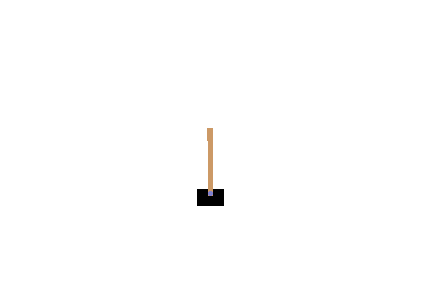
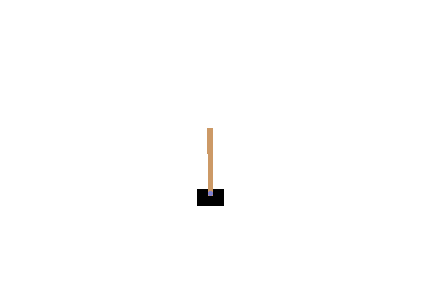
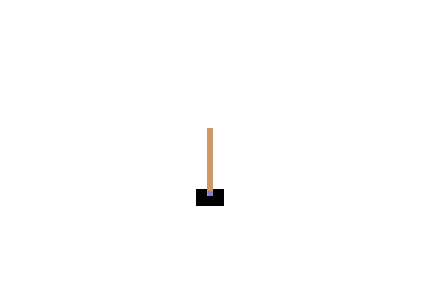
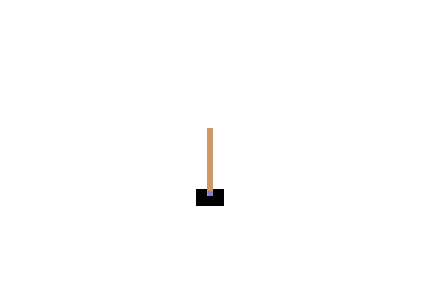
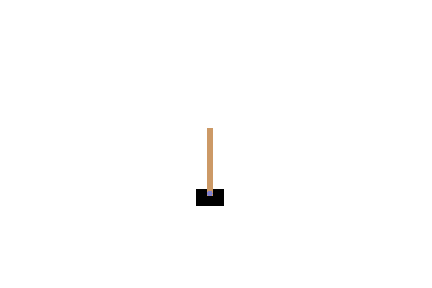
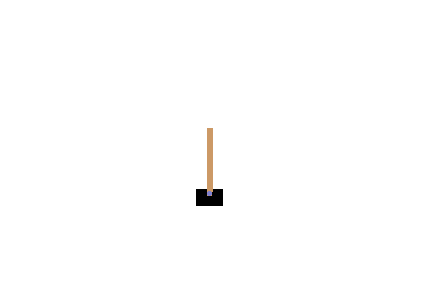
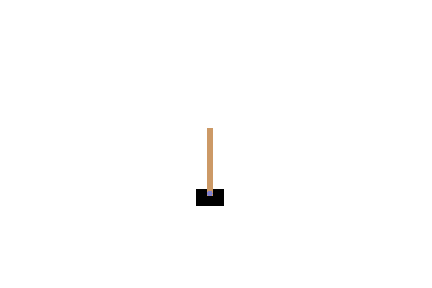
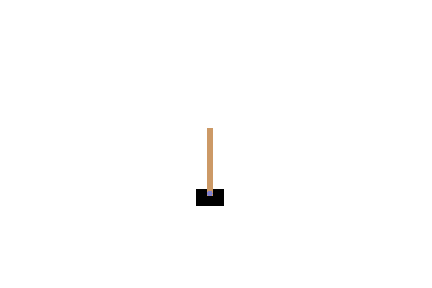
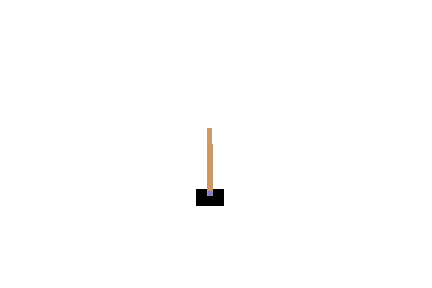
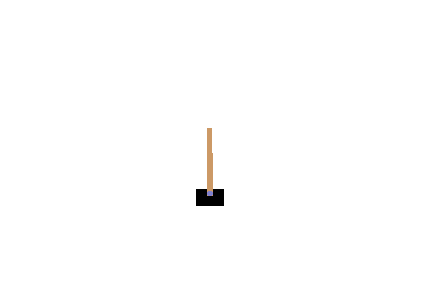
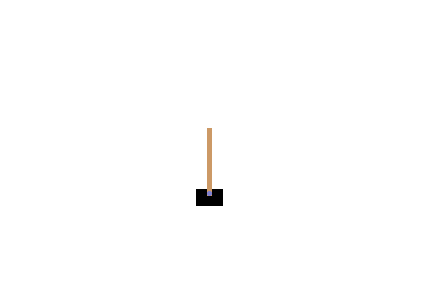
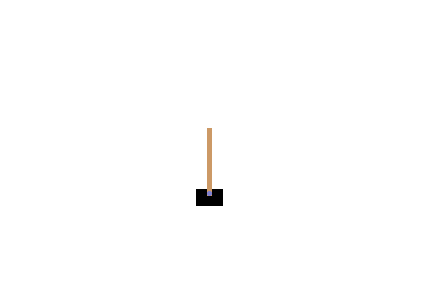

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers

from JSAnimation.IPython_display import display_animation
from IPython.display import display
from matplotlib import animation

%matplotlib inline

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

def get_action(s, w):
    return 1 if s.dot(w) > 0 else 0

def play_one_episode(env, params, display=False):
    observation = env.reset()
    done = False
    t = 0
    frames = []
    
    while not done and t < 10000:
        if display:
            frames.append(env.render(mode='rgb_array'))
        t += 1
        action = get_action(observation, params)
        observation, reward, done, _ = env.step(action)
        if done:
            if display:
                env.render(close=True)
                display_frames_as_gif(frames)
            break
    return t

def play_multiple_episodes(env, T, params):
    episodes = np.empty(T)
    for i in range(T):
        episodes[i] = play_one_episode(env, params)
    avg_length = np.mean(episodes)
    print('Avg length: {}'.format(avg_length))
    return avg_length

def random_search(env):
    episode_lengths = []
    best = 0
    params = None
    for t in range(100):
        new_params = np.random.random(4) * 2 - 1
        avg_length = play_multiple_episodes(env, 100, new_params)
        episode_lengths.append(avg_length)
        if avg_length > best:
            params = new_params
            best = avg_length
    return episode_lengths, params

if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    #env = wrappers.Monitor(env, 'video')
    episode_lengths, params = random_search(env)
    plt.plot(episode_lengths)
    plt.show()
    
    best_length = play_multiple_episodes(env, 100, params)
    print('Best params length: {}'.format(best_length))
    play_one_episode(env, params, display=True)